In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
from pathlib import Path
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean
import cmocean.cm as cmo

from pykml import parser
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


lat_top=30
lat_bot=27
lon_left=-92
lon_rigth=-88.75

extent=[lon_left, lon_rigth, lat_bot, lat_top]

In [2]:
df = pd.read_csv('../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/stations.csv', sep=',', index_col=0)
df

,Lat,Lon
Name,,
St.11,28.212711,-89.571360
St.12,28.593656,-88.890999
St.13,28.518589,-89.610482
St.14,28.727365,-89.613951
St.15,28.946873,-88.846049
St.16,28.891849,-89.542663
St.2,28.897664,-89.597111
St.4,28.795941,-90.702223
St.5B,28.804316,-91.332270


Number of polygons extracted: 1


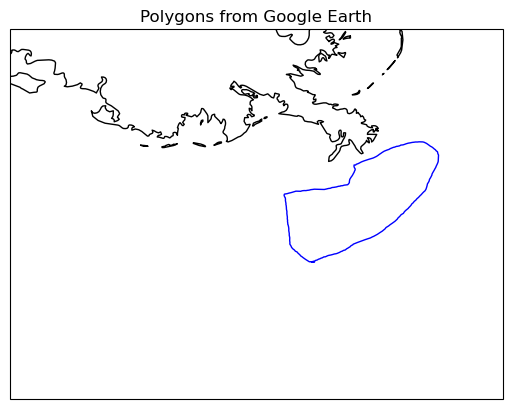

In [3]:


# Load KML file
kml_file_path = '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/S.kml'

# Read KML file as bytes to avoid Unicode declaration issue
with open(kml_file_path, 'rb') as file:
    doc = file.read()

# Parse KML using pykml
kml_doc = parser.fromstring(doc)

# Extract polygons from the KML
polygons = []
for placemark in kml_doc.Document.Placemark:
    geom_text = placemark.Polygon.outerBoundaryIs.LinearRing.coordinates.text.strip()
    coords = [tuple(map(float, p.split(',')[:2])) for p in geom_text.split()]
    polygon = Polygon(coords)
    polygons.append(polygon)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(geometry=polygons)

# Check the number of polygons extracted
print("Number of polygons extracted:", len(polygons))

# Plot polygons with Cartopy
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add natural Earth features for context
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot polygons if there are any
if not gdf.empty:
    for polygon in gdf.geometry:
        ax.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='blue')
else:
    print("No polygons to plot.")

# Set extent (optional)
ax.set_extent([-92, -88, 27, 30], crs=ccrs.PlateCarree())

# Customize the plot
plt.title('Polygons from Google Earth')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Save the plot
plt.savefig('polygons_map.png')

# Show the plot
plt.show()


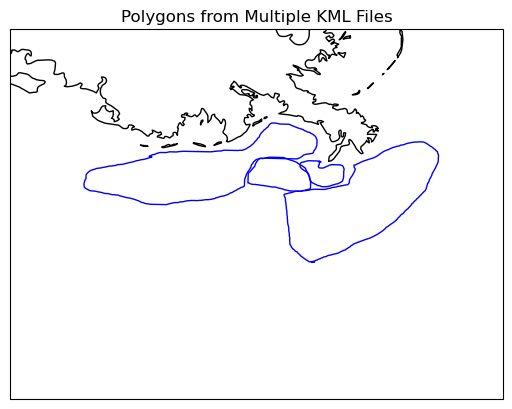

In [4]:
from pykml import parser
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# List of KML file paths
kml_files = [
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/HS.kml',
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/PS.kml',
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/DS.kml',
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/S.kml'
]

# Function to extract polygons from a KML file
def extract_polygons(kml_file):
    try:
        with open(kml_file, 'rb') as file:
            doc = file.read()
        kml_doc = parser.fromstring(doc)
        polygons = []
        for placemark in kml_doc.Document.Placemark:
            geom_text = placemark.Polygon.outerBoundaryIs.LinearRing.coordinates.text.strip()
            coords = [tuple(map(float, p.split(',')[:2])) for p in geom_text.split()]
            polygon = Polygon(coords)
            polygons.append(polygon)
        return gpd.GeoDataFrame(geometry=polygons)
    except FileNotFoundError:
        print(f"File not found: {kml_file}")
        return None

# List to hold GeoDataFrames from each KML file
gdfs = []

# Process each KML file
for kml_file in kml_files:
    gdf = extract_polygons(kml_file)
    if gdf is not None:
        gdfs.append(gdf)

# Check if any data was loaded
if gdfs:
    # Combine all GeoDataFrames into a single GeoDataFrame (optional)
    combined_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

    # Plotting all polygons with Cartopy
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

    # Add natural Earth features for context
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot polygons if there are any
    if not combined_gdf.empty:
        for polygon in combined_gdf.geometry:
            ax.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='blue')
    else:
        print("No polygons to plot.")

    # Set extent (optional)
    ax.set_extent([-92, -88, 27, 30], crs=ccrs.PlateCarree())

    # Customize the plot
    plt.title('Polygons from Multiple KML Files')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Save the plot
    plt.savefig('multi_kml_polygons_map.png')

    # Show the plot
    plt.show()
else:
    print("No valid data found.")


<GeoAxes: >

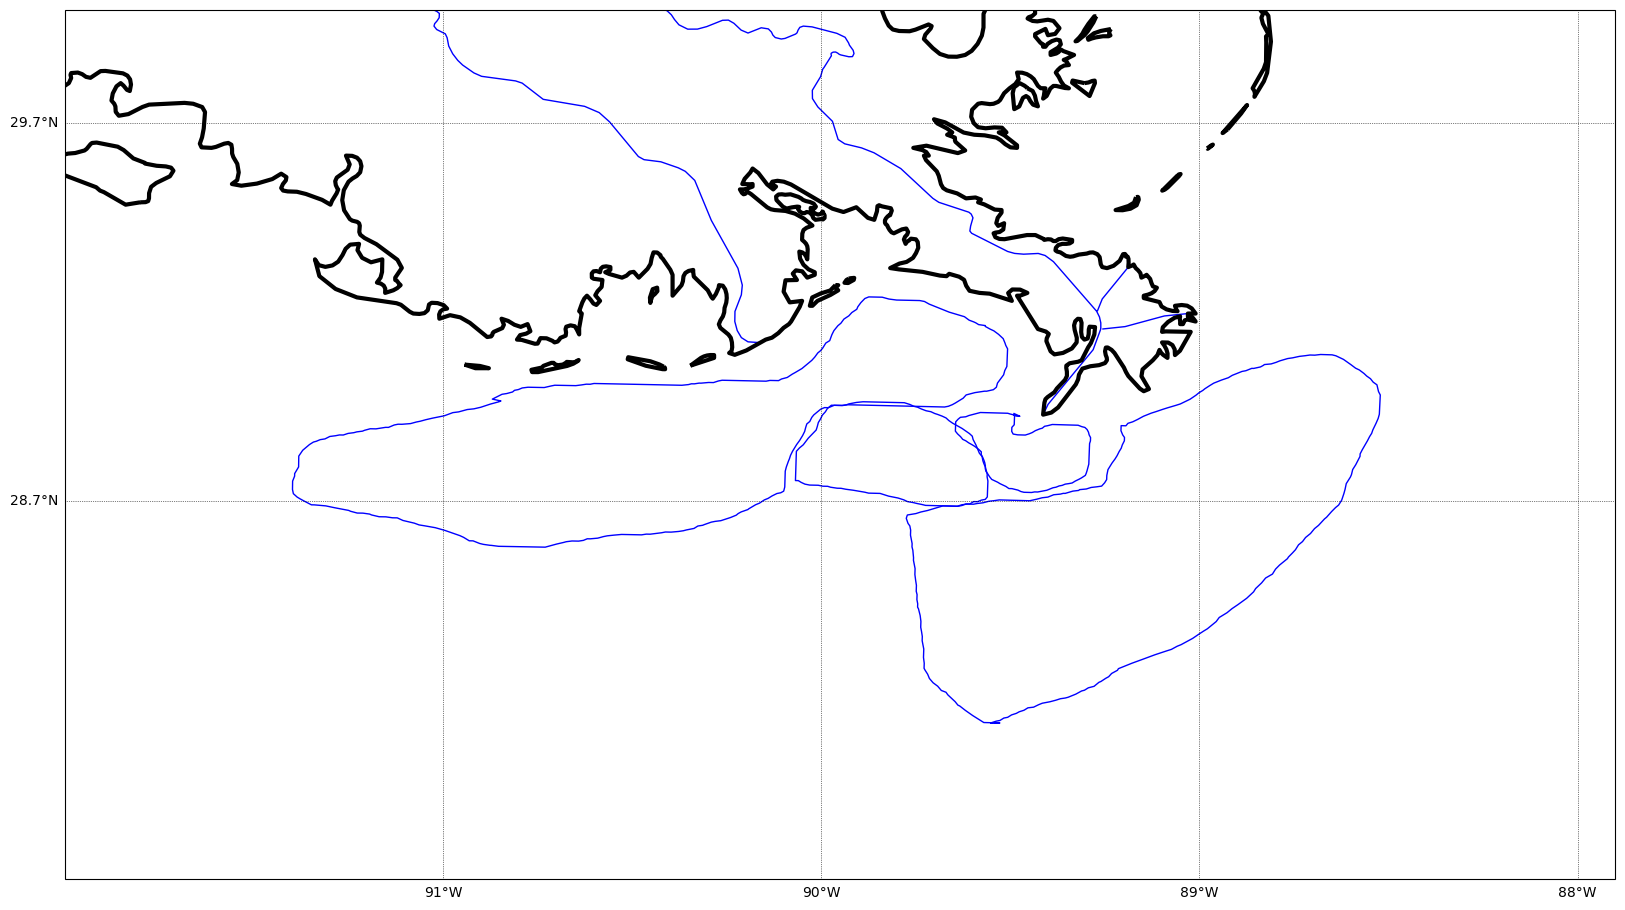

In [5]:
lat_top=30
lat_bot=27.7
lon_left=-92
lon_rigth=-87.9

extent=[lon_left, lon_rigth, lat_bot, lat_top]

res = '10m'

def plot_mapbase(extent, ax=None, res='10m', projection=ccrs.PlateCarree()):
    if ax is None:
        fig = plt.figure(figsize=(10,5)) # set fig size
        ax = fig.add_subplot(111, projection=projection)
        
    ax.set_extent(extent)
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='white', 
                                                scale=res)) 
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor='blue',
                                                facecolor='none',
                                                scale=res))
    ax.add_feature(cfeature.COASTLINE, linewidth=3)
    gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                      ylocs=np.arange(lat_bot, lat_top+1),
                      draw_labels=True, 
                      linewidth=0.5, color='k', linestyle=':')
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return ax

fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})
for polygon in combined_gdf.geometry:
    axes.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='blue')
plot_mapbase(extent, ax=axes)

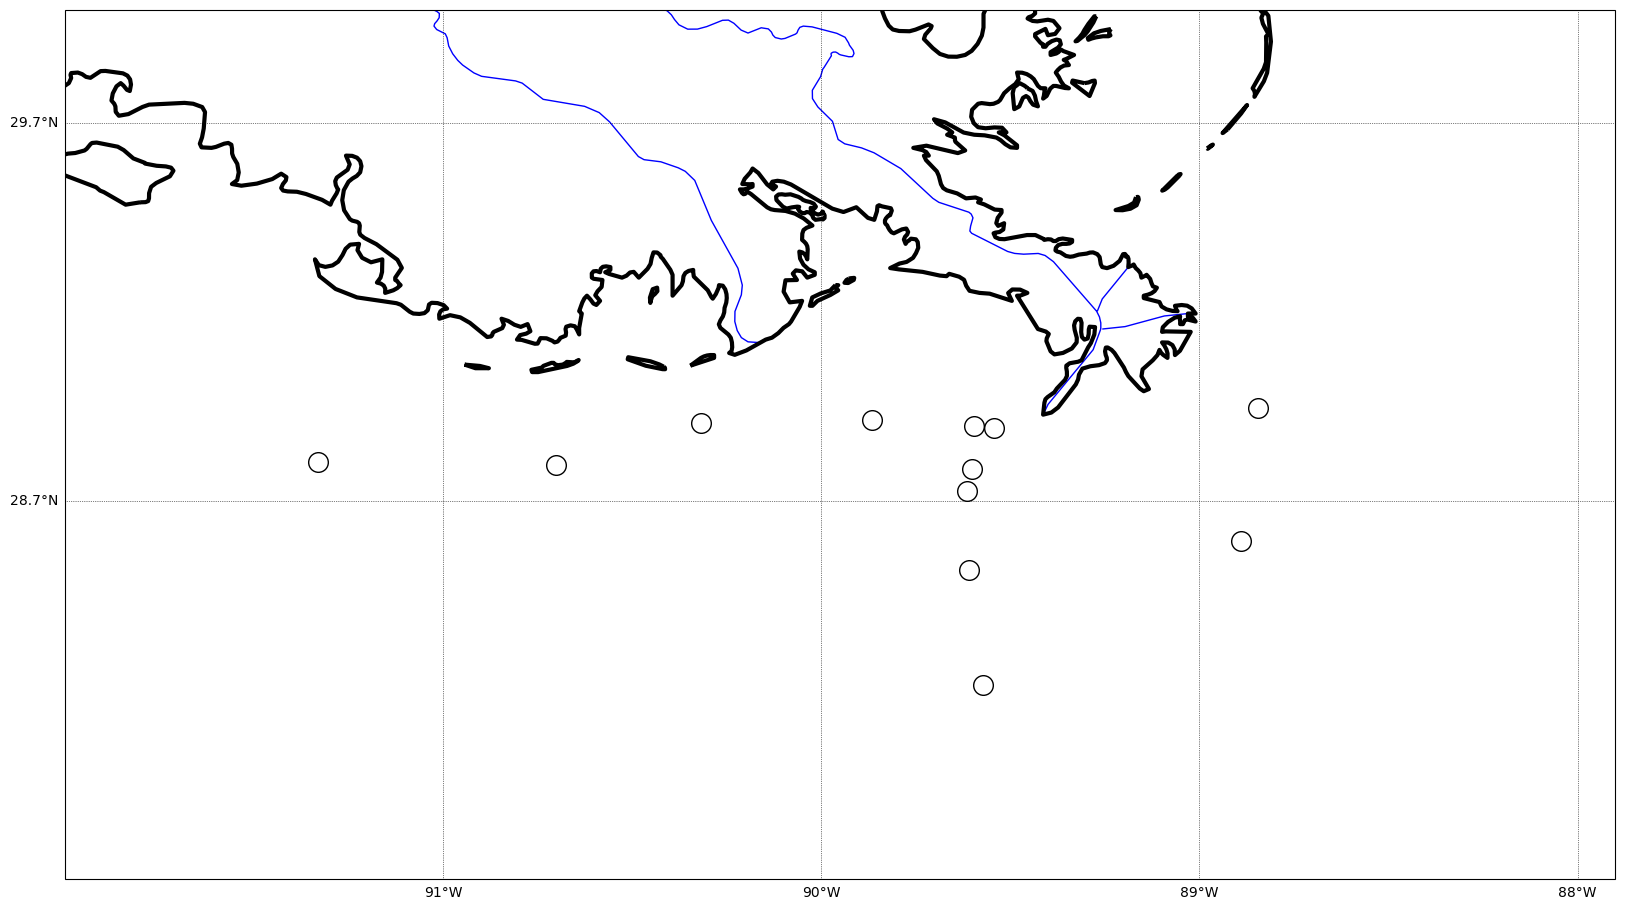

In [6]:
fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})
plot_mapbase(extent, ax=axes)
mappable = axes.scatter(df['Lon'], df['Lat'],
                                   c='white',
                                   edgecolor='k',
                                   s=200,
                                   transform=ccrs.PlateCarree())


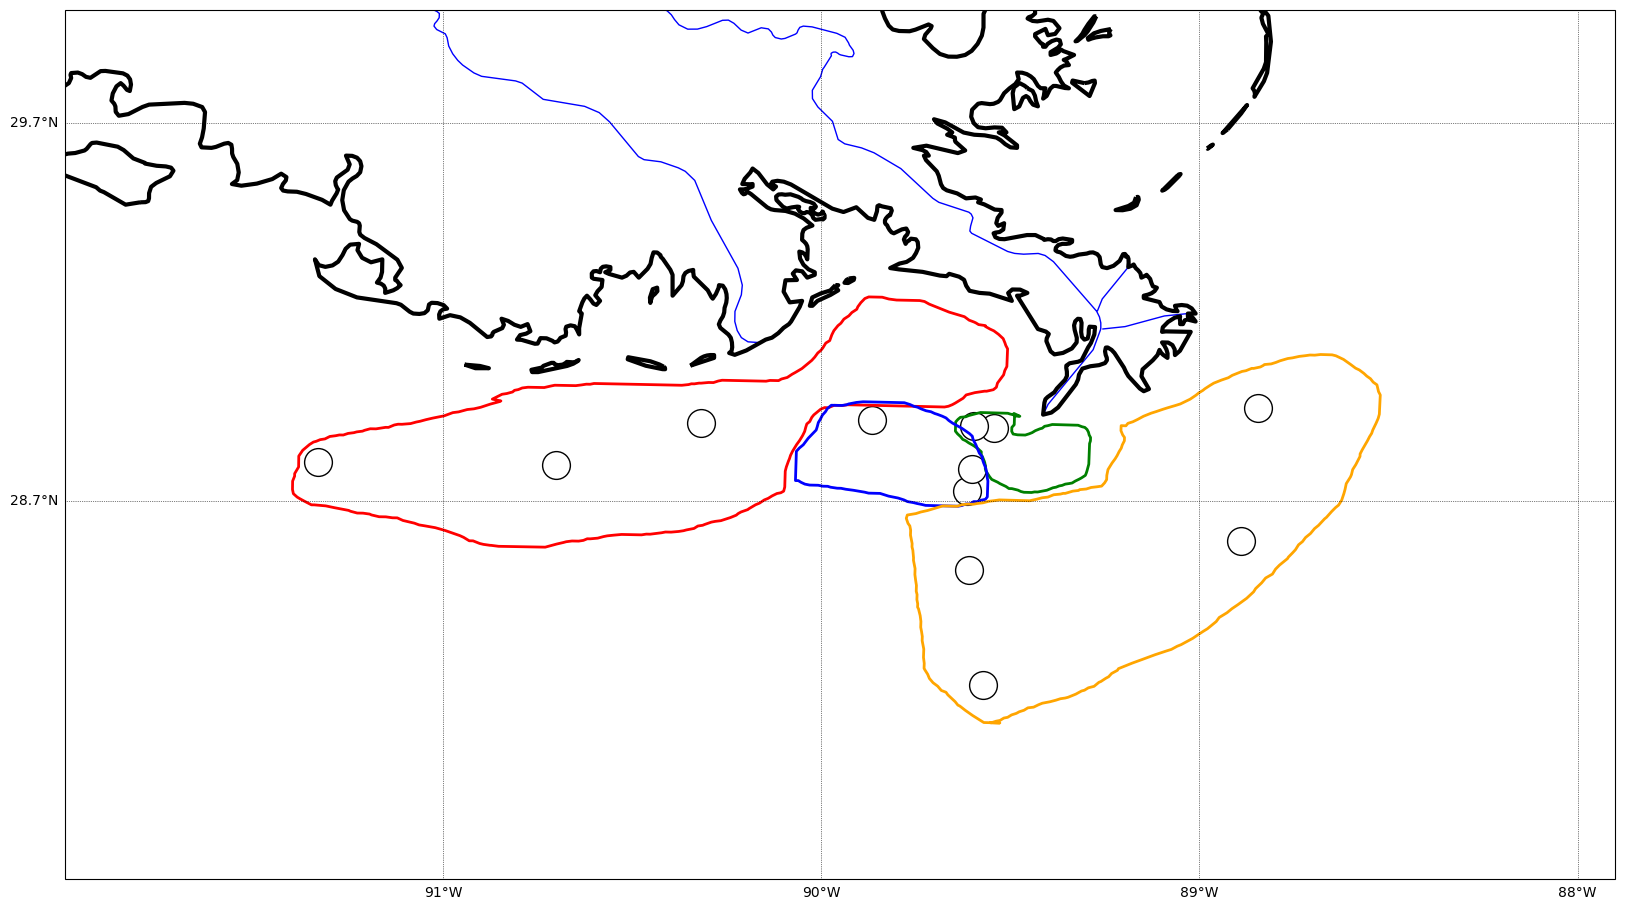

In [7]:
colors = ['red', 'green', 'blue', 'orange']  # Specify your colors here



fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})
plot_mapbase(extent, ax=axes)
mappable = axes.scatter(df['Lon'], df['Lat'],
                                   c='white',
                                   edgecolor='k',
                                   s=400,
                                   transform=ccrs.PlateCarree())


for i, polygon in enumerate(combined_gdf.geometry):
    axes.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor='none', edgecolor=colors[i], linewidth = 2)

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_24348\610172058.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes.text(lon[i], lat[i], text[i],


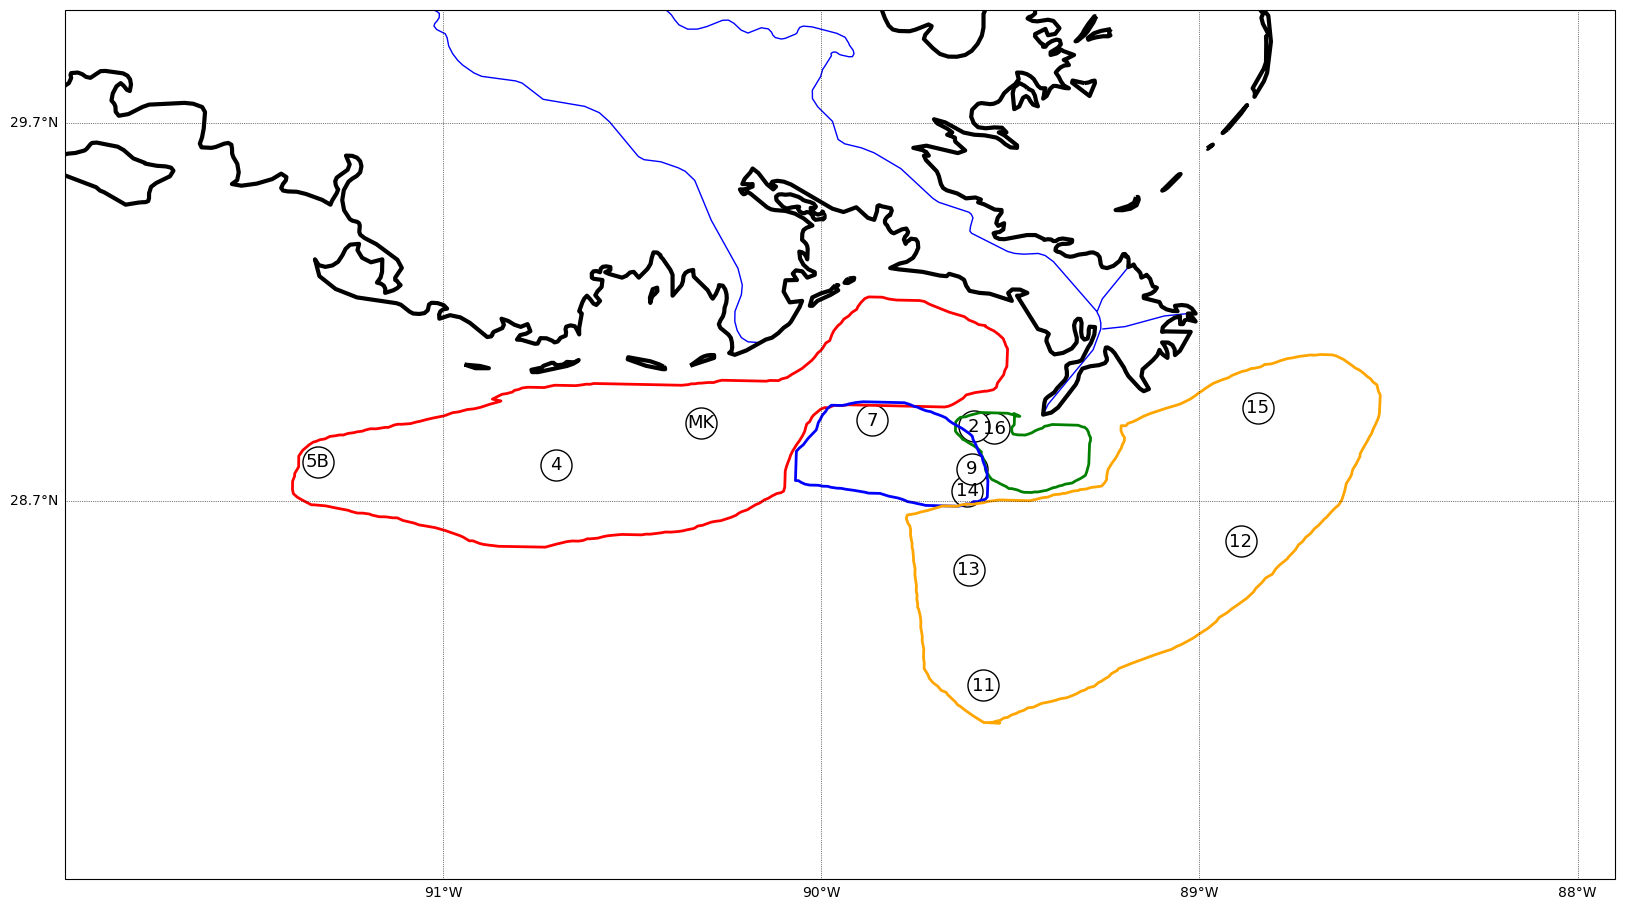

In [8]:
colors = ['red', 'green', 'blue', 'orange']  # Specify your colors here
text = [x[3:] for x in df.index.ravel()]
lon = df['Lon']
lat = df['Lat']

fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})
plot_mapbase(extent, ax=axes)

for i, polygon in enumerate(combined_gdf.geometry):
    axes.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor='none', edgecolor=colors[i], linewidth = 2)

mappable = axes.scatter(df['Lon'], df['Lat'],
                                   c='white',
                                   edgecolor='black',
                                   s=500,
                                   transform=ccrs.PlateCarree())
for i, txt in enumerate(text):
    axes.text(lon[i], lat[i], text[i], 
             verticalalignment='center', horizontalalignment='center',
             fontsize=13)

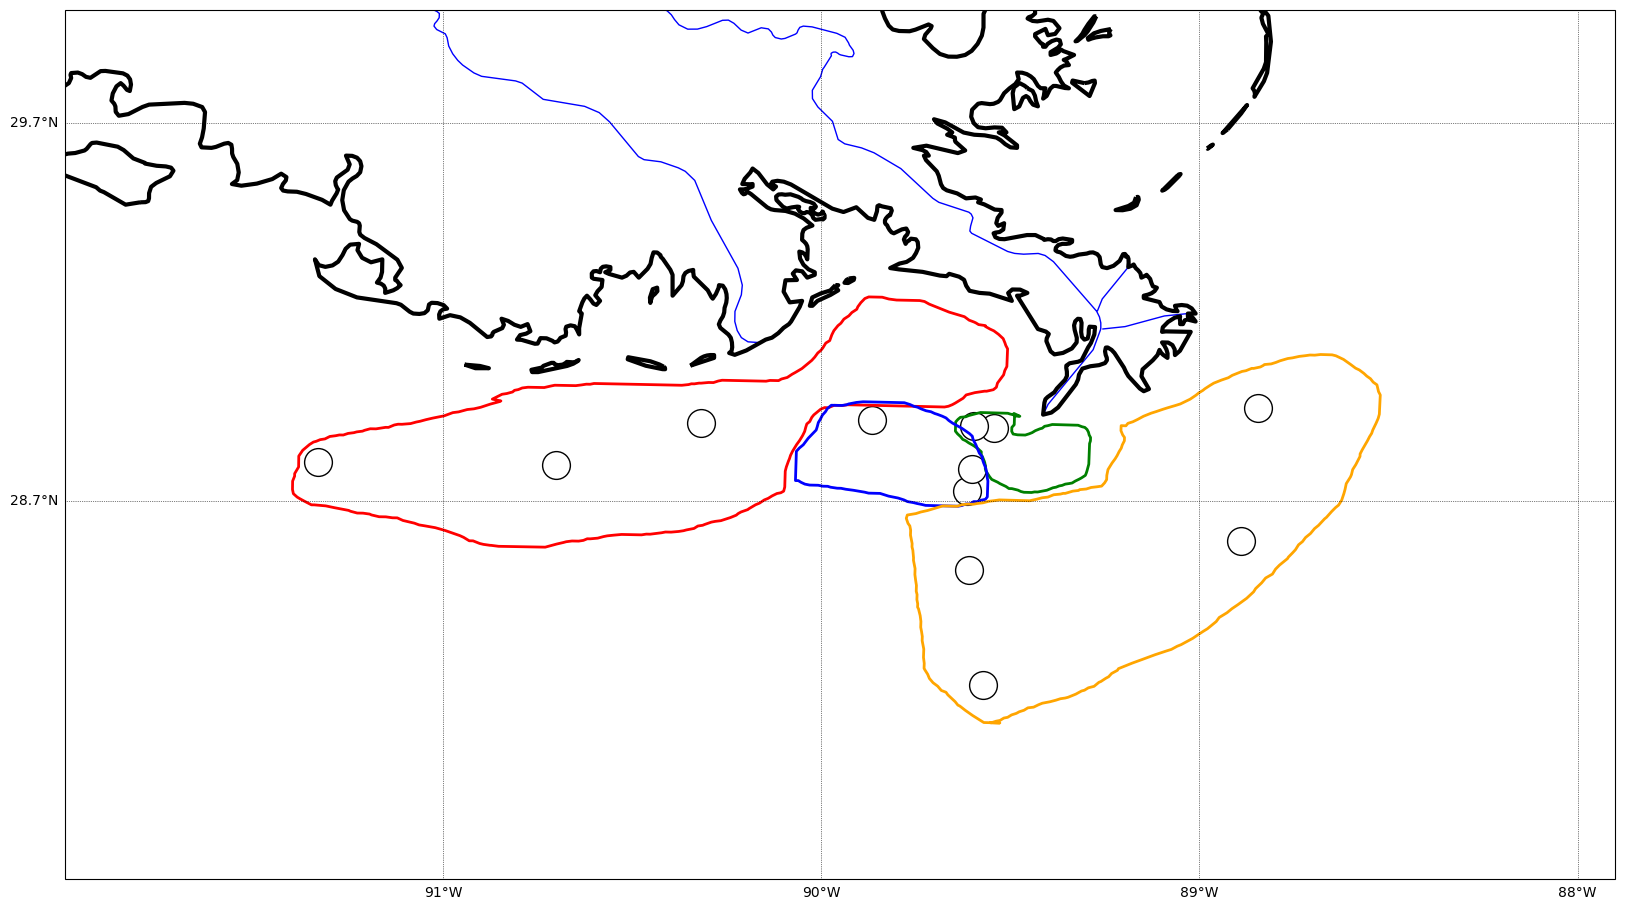

In [9]:
colors = ['red', 'green', 'blue', 'orange']  # Specify your colors here



fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})
plot_mapbase(extent, ax=axes)
mappable = axes.scatter(df['Lon'], df['Lat'],
                                   c='white',
                                   edgecolor='k',
                                   s=400,
                                   transform=ccrs.PlateCarree())

for i, polygon in enumerate(combined_gdf.geometry):
    axes.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor='none', edgecolor=colors[i], linewidth = 2)

<GeoAxes: >

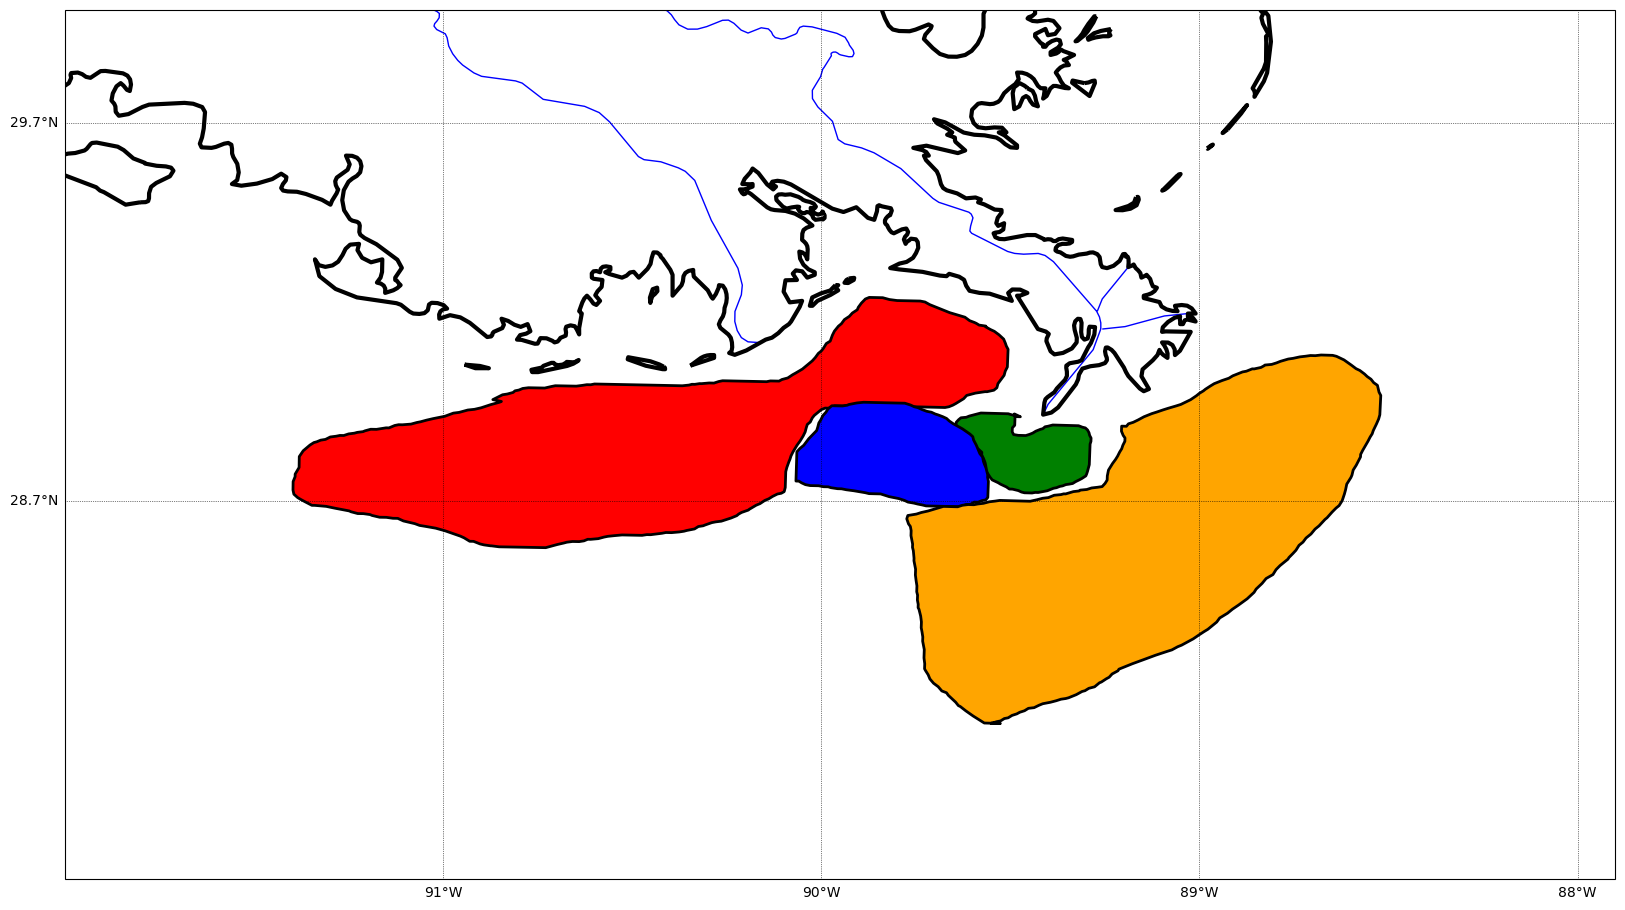

In [10]:
# Generate a list of unique colors for each polygon
num_polygons = len(combined_gdf)
colors = plt.cm.viridis_r(range(num_polygons))
colors = ['red', 'green', 'blue', 'orange']  # Specify your colors here


# Plotting all polygons with Cartopy
fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})

for i, polygon in enumerate(combined_gdf.geometry):
    axes.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor=colors[i], edgecolor='black', linewidth=2)
plot_mapbase(extent, ax=axes)


C:\Users\hmlbr\AppData\Local\Temp\ipykernel_24348\435769717.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes.text(lon[i], lat[i], txt,


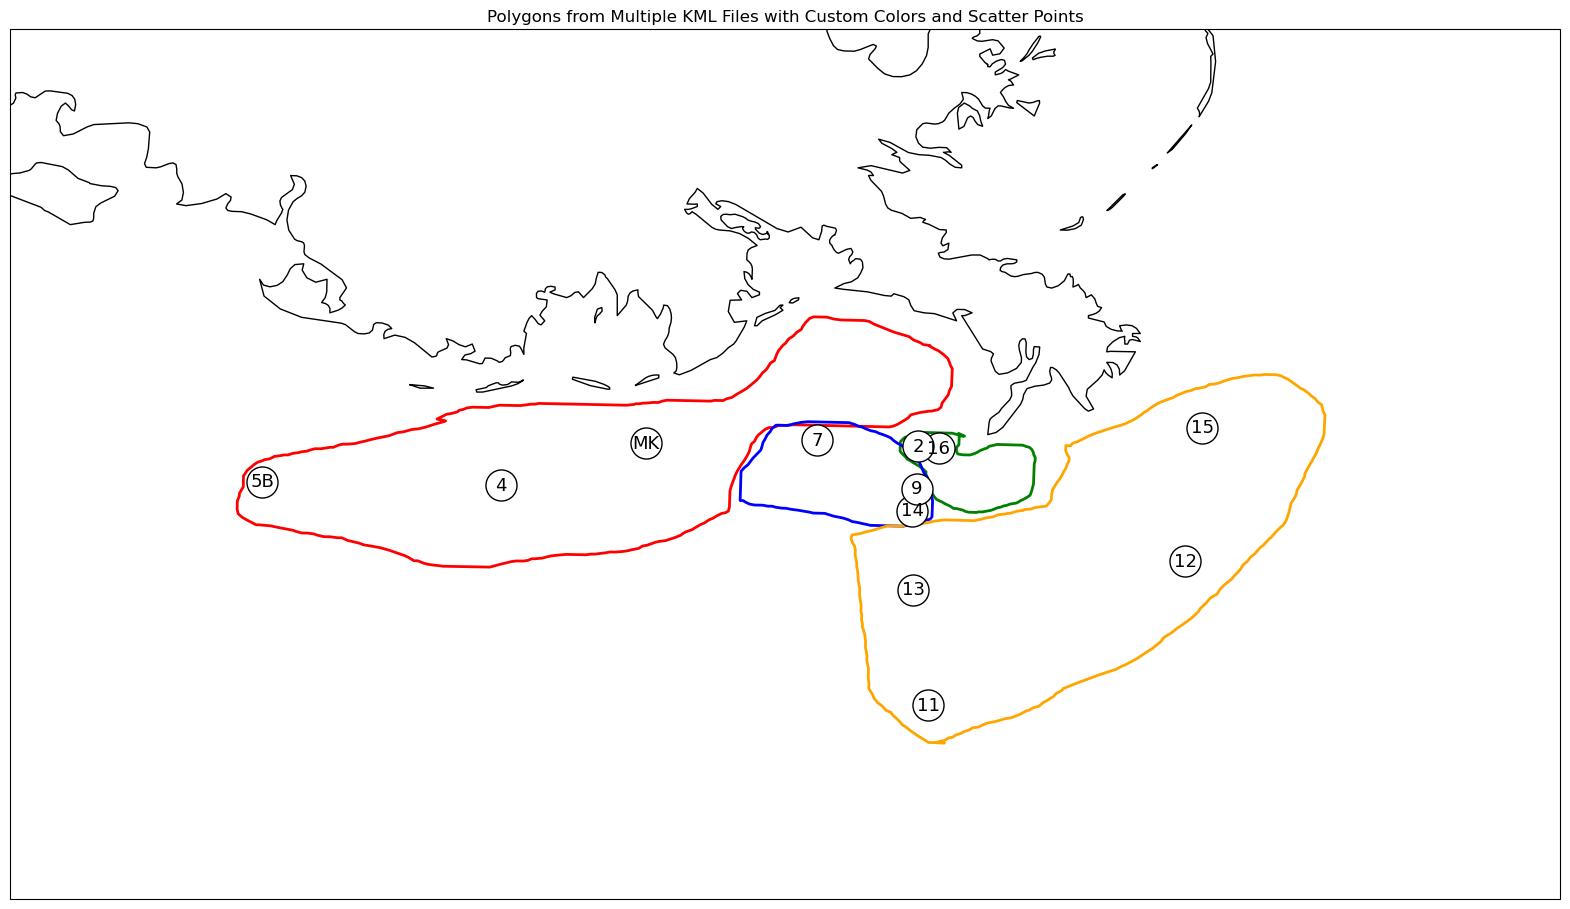

In [11]:
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define custom colors for each polygon
colors = ['red', 'green', 'blue', 'orange']  # Specify your colors here

# Generate text labels, longitude, and latitude
text = [x[3:] for x in df.index.ravel()]
lon = df['Lon']
lat = df['Lat']

# Create the figure and axes with PlateCarree projection
fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})

# Add base map features
axes.add_feature(cfeature.COASTLINE)
axes.add_feature(cfeature.BORDERS, linestyle=':')

# Set the extent (make sure it covers your points)
axes.set_extent(extent, crs=ccrs.PlateCarree())

# Plot each polygon with a unique color, and set zorder lower to draw it behind points
for i, polygon in enumerate(combined_gdf.geometry):
    axes.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor='none', edgecolor=colors[i % len(colors)], linewidth=2, zorder=1)

# Plot scatter points, setting a higher zorder to ensure they are on top of the polygons
mappable = axes.scatter(lon, lat,
                        c='white',
                        edgecolor='black',
                        s=500,
                        transform=ccrs.PlateCarree(),
                        zorder=2)

# Plot text labels on top of the points, also with a high zorder
for i, txt in enumerate(text):
    axes.text(lon[i], lat[i], txt, 
              verticalalignment='center', horizontalalignment='center',
              fontsize=13, transform=ccrs.PlateCarree(), zorder=3)

# Customize the plot
plt.title('Polygons from Multiple KML Files with Custom Colors and Scatter Points')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Save the plot

# Show the plot
plt.show()



In [12]:
# the plot below works good. 
# you are trying to make the colors the colors of CMO deep 
# then you can costum change up the lables for the points 
# then you can add regon lables. 

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_24348\1344578680.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes.text(lon[i], lat[i], txt,


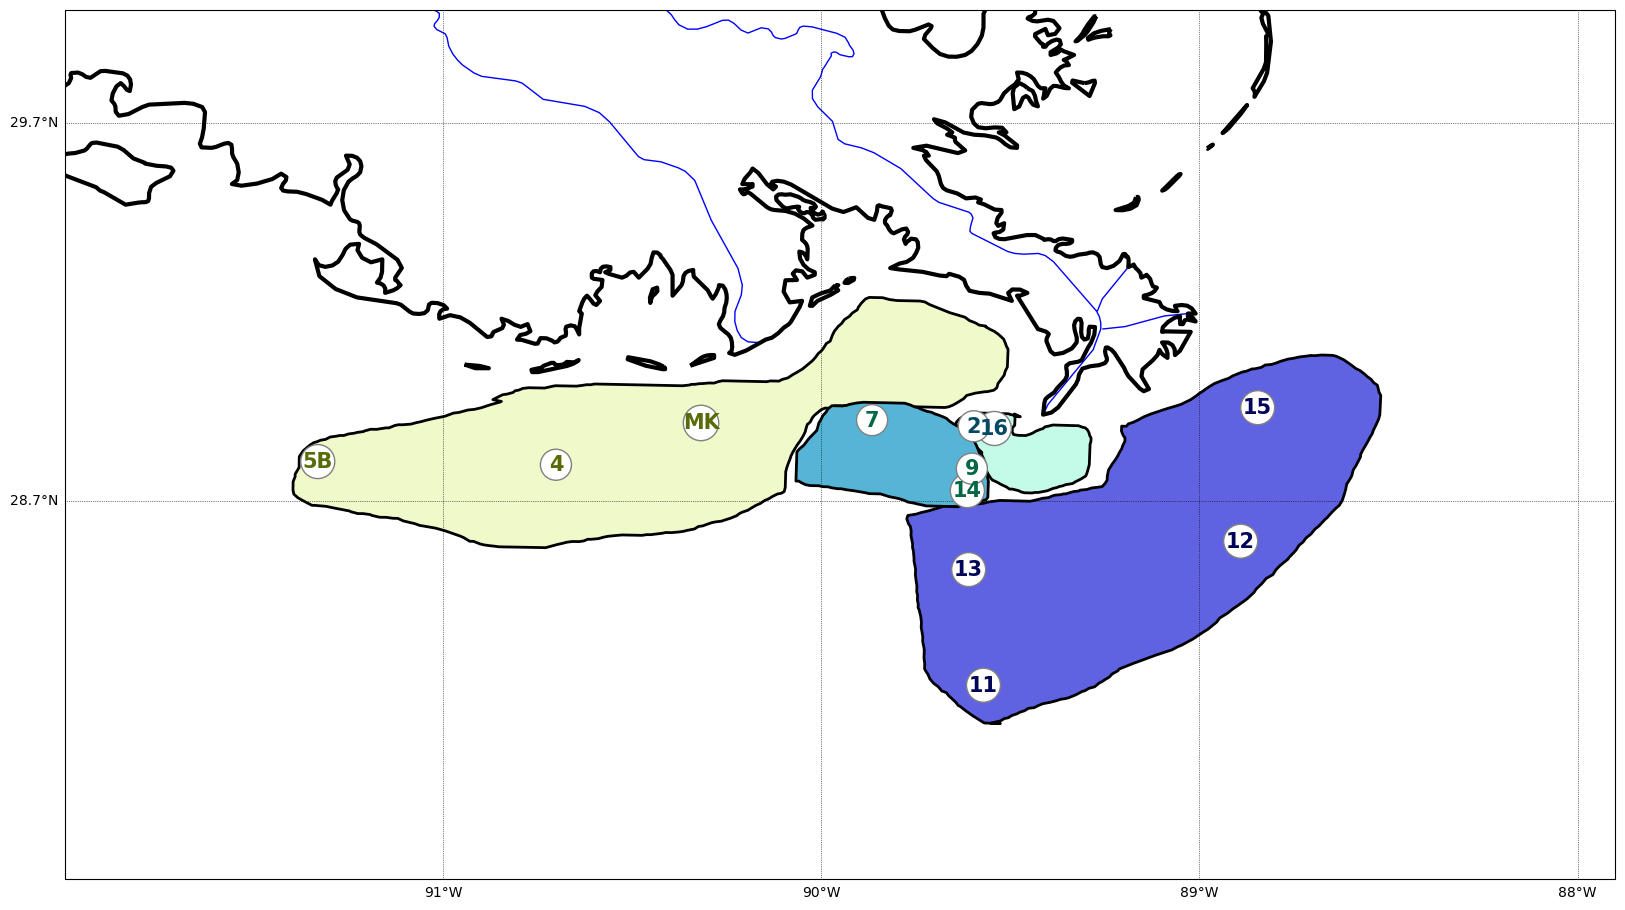

In [13]:
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define custom colors for each polygon
colors = ['#EFF9CA', '#C4FBE8', '#56B5D6', '#5F63E2']  # Specify your colors here

# Generate text labels, longitude, and latitude
text = [x[3:] for x in df.index.ravel()]
lon = df['Lon']
lat = df['Lat']
ss = [600, 600, 600, 600, 600, 600, 500, 500, 600, 500, 500, 650]
txt_color = ['#020558', '#020558', '#020558', '#026845', '#020558', '#024961', '#024961', '#576C07', '#576C07', '#026845', '#026845', '#576C07']



# Create the figure and axes with PlateCarree projection
fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})

plot_mapbase(extent, ax=axes)


# Plot each polygon with a unique color, and set zorder lower to draw it behind points
for i, polygon in enumerate(combined_gdf.geometry):
    axes.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor=colors[i % len(colors)], 
                        edgecolor='black', linewidth=2,
                        zorder=1)

# Plot scatter points, setting a higher zorder to ensure they are on top of the polygons
mappable = axes.scatter(lon, lat,
                        c='white',
                        edgecolor='grey',
                        s=ss,
                        transform=ccrs.PlateCarree(),
                        zorder=2)

# Plot text labels on top of the points, also with a high zorder
for i, txt in enumerate(text):
    axes.text(lon[i], lat[i], txt, 
              verticalalignment='center', horizontalalignment='center',
              fontsize=15, transform=ccrs.PlateCarree(), fontweight='bold', 
              color=txt_color[i],
              zorder=3)

# Save the plot
plt.savefig('../Dissertation_projects/Figures/multi_kml_polygons_map_custom_colored_with_points.png')

# Show the plot
plt.show()



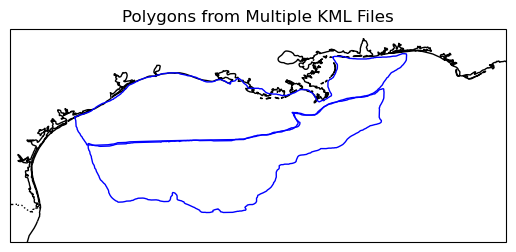

In [14]:
from pykml import parser
from shapely.geometry import Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# List of KML file paths
kml_files = [
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/GOM_shelf.kml',
    '../Dissertation_projects/Carbon_cycling_project/KML_files_for_area_map/GOM_slope.kml'
]

# Function to extract polygons from a KML file
def extract_polygons(kml_file):
    try:
        with open(kml_file, 'rb') as file:
            doc = file.read()
        kml_doc = parser.fromstring(doc)
        polygons = []
        for placemark in kml_doc.Document.Placemark:
            geom_text = placemark.Polygon.outerBoundaryIs.LinearRing.coordinates.text.strip()
            coords = [tuple(map(float, p.split(',')[:2])) for p in geom_text.split()]
            polygon = Polygon(coords)
            polygons.append(polygon)
        return gpd.GeoDataFrame(geometry=polygons)
    except FileNotFoundError:
        print(f"File not found: {kml_file}")
        return None

# List to hold GeoDataFrames from each KML file
gdfs = []

# Process each KML file
for kml_file in kml_files:
    gdf = extract_polygons(kml_file)
    if gdf is not None:
        gdfs.append(gdf)

# Check if any data was loaded
if gdfs:
    # Combine all GeoDataFrames into a single GeoDataFrame (optional)
    combined_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

    # Plotting all polygons with Cartopy
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

    # Add natural Earth features for context
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Plot polygons if there are any
    if not combined_gdf.empty:
        for polygon in combined_gdf.geometry:
            ax.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='blue')
    else:
        print("No polygons to plot.")

    # Set extent (optional)
    ax.set_extent([-98, -84, 25, 31], crs=ccrs.PlateCarree())

    # Customize the plot
    plt.title('Polygons from Multiple KML Files')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Save the plot
    plt.savefig('multi_kml_polygons_map.png')

    # Show the plot
    plt.show()
else:
    print("No valid data found.")

<GeoAxes: >

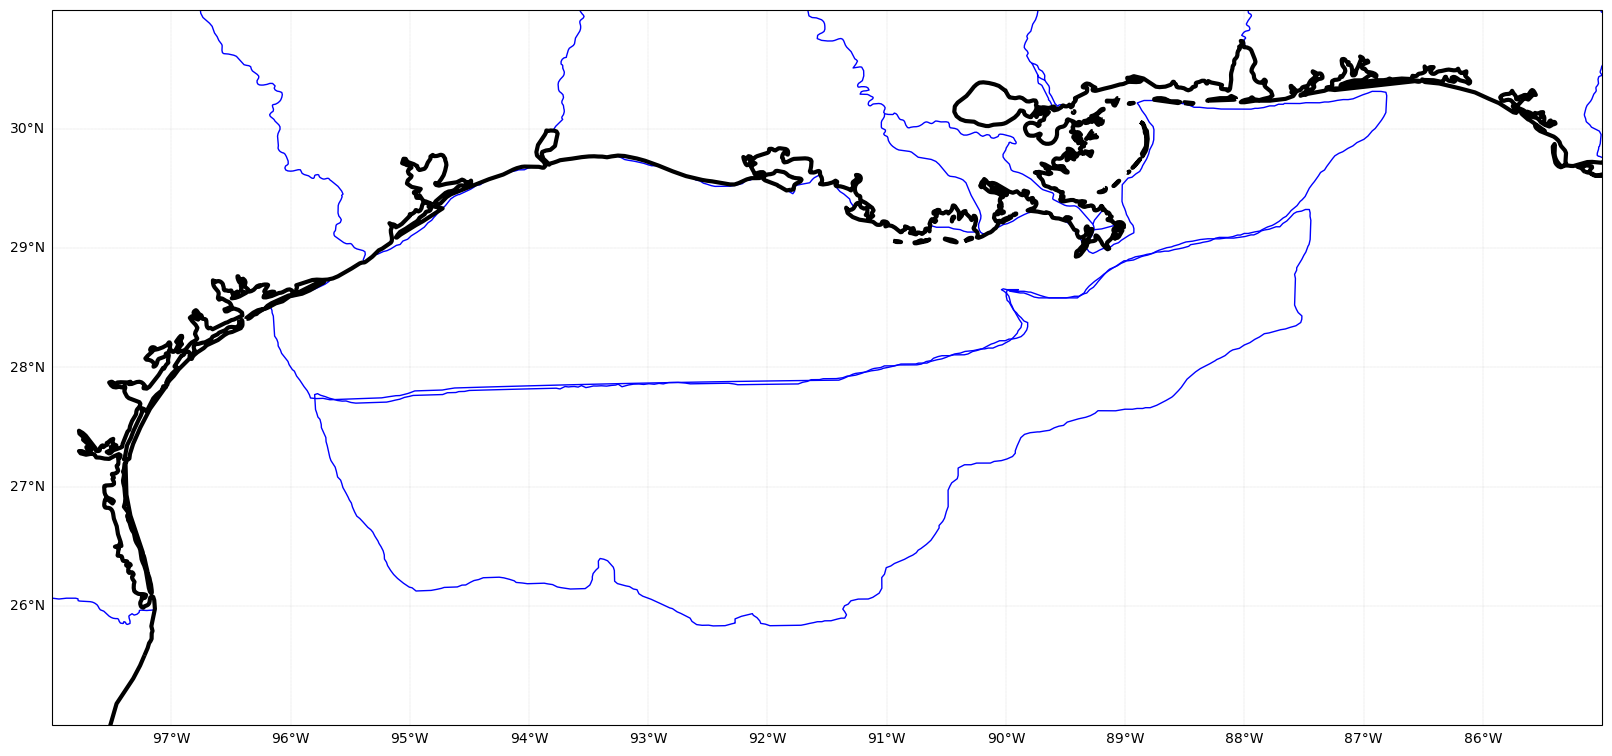

In [19]:
lat_top=31
lat_bot=25
lon_left=-98
lon_rigth=-85

extent=[lon_left, lon_rigth, lat_bot, lat_top]

res = '10m'

def plot_mapbase(extent, ax=None, res='10m', projection=ccrs.PlateCarree()):
    if ax is None:
        fig = plt.figure(figsize=(10,5)) # set fig size
        ax = fig.add_subplot(111, projection=projection)
        
    ax.set_extent(extent)
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='white', 
                                                scale=res)) 
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor='blue',
                                                facecolor='none',
                                                scale=res))
    ax.add_feature(cfeature.COASTLINE, linewidth=3)
    gl = ax.gridlines(xlocs=np.arange(lon_left, lon_rigth+1),
                      ylocs=np.arange(lat_bot, lat_top+1),
                      draw_labels=True, 
                      linewidth=0.1, color='k', linestyle=':')
    gl.top_labels = gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return ax

fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})
for polygon in combined_gdf.geometry:
    axes.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor='none', edgecolor='blue')
plot_mapbase(extent, ax=axes)

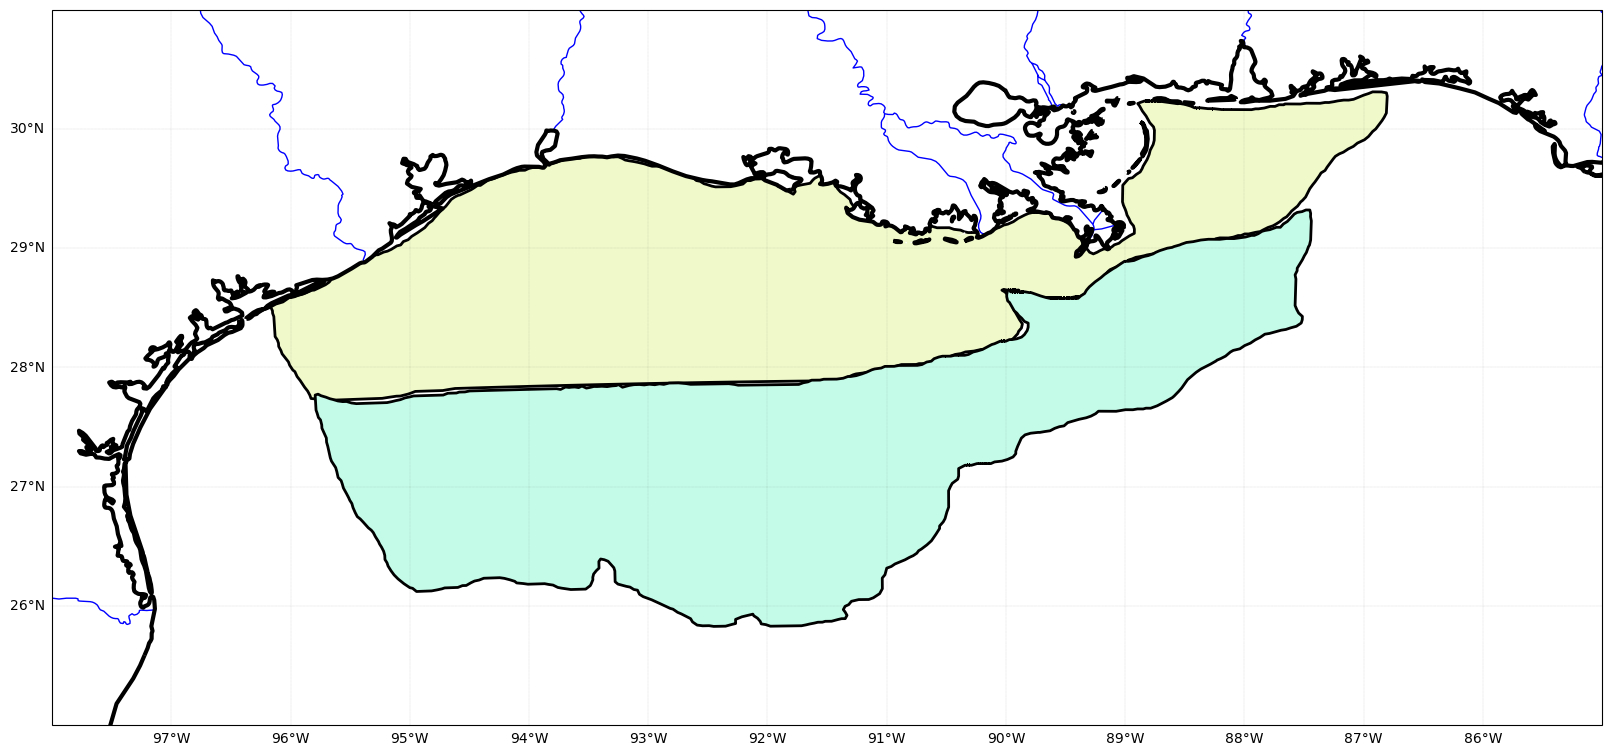

In [20]:
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define custom colors for each polygon
colors = ['#EFF9CA', '#C4FBE8', '#56B5D6', '#5F63E2']  # Specify your colors here

# Generate text labels, longitude, and latitude
text = [x[3:] for x in df.index.ravel()]
lon = df['Lon']
lat = df['Lat']
ss = [600, 600, 600, 600, 600, 600, 500, 500, 600, 500, 500, 650]
txt_color = ['#020558', '#020558', '#020558', '#026845', '#020558', '#024961', '#024961', '#576C07', '#576C07', '#026845', '#026845', '#576C07']



# Create the figure and axes with PlateCarree projection
fig, axes = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})

plot_mapbase(extent, ax=axes)


# Plot each polygon with a unique color, and set zorder lower to draw it behind points
for i, polygon in enumerate(combined_gdf.geometry):
    axes.add_geometries([polygon], crs=ccrs.PlateCarree(), facecolor=colors[i % len(colors)], 
                        edgecolor='black', linewidth=2,
                        zorder=1)


# Save the plot
plt.savefig('../Dissertation_projects/Figures/big_multi_kml_polygons_map_custom_colored_with_points.png')

# Show the plot
plt.show()
